In [16]:
import tensorflow as tf
import numpy as np

In [17]:
celsius    = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)


In [18]:
capa   = tf.keras.layers.Dense(units =1, input_shape =[1])
modelo = tf.keras.Sequential([capa])

### Optimizer
- La celda inferior me permite ir optimizando la red neuronal gracias al algoritmo Adam. El valor proporiconado a Adam marca la tasa de aprendizaje, estableciendo de cuanto en cuanto se deben reajustar los sesgos y pesos de las conexiones de las neuronas.
- Cuando menor sea el valor de Adam, mayor fineza vamos a tener y por tanto mayor costo computacional.

### LOSS
- La funcion "loss" va a tomar el valor "mean_squared_error". Esto significa que usa el principio del error cuadrático medio, que viene a significar que pocos errores grandes son mucho peores que varios errores pequeños.

In [19]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1),
              loss ="mean_squared_error")

### Entrenamiento
- Vamos a emplear la función "fit", al cual le debo pasar 3 parámetros.
    - Primero: El array de entradas.
    - Segundo: El array de salidas.
    - Tercero: El número de vueltas
- Las vueltas es el número de iteraciones que hará nuestro modelo para ir corrigiendo los errores.

- Al margen de esto, es interesante añadir el atributo "verbose=False" para que no se nos impriman valores absurdos mientras se entrena el modelo.
 

In [20]:
print("Inicio del entrenamiento ...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000,verbose=False)
print("Fin del entrenamiento ...")

Inicio del entrenamiento ...
Fin del entrenamiento ...


### Información sobre el entrenamiento
- Vamos a importar "matplotlib.pyplot" para poder estudiar el rendimiento de nuestro entrenamiento. 

In [21]:
import matplotlib.pyplot as plt

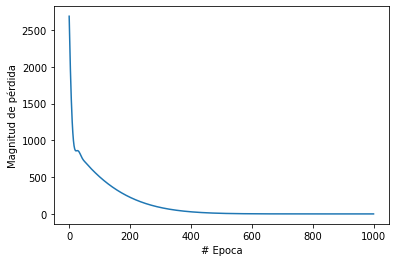

In [22]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

### Análisis de la gráfica anterior
- A raiz de la gráfica podemos observar una asíntota en el eje "X" que nos indica que a partir de las 400 vueltas nuestras pérdidas toman un valor constante, por lo que con un valor en el margen [400,500] nos habría valido para entrenar al modelo.

- El siguiente paso es introducir un valor en ºC, y observar como de cerca queda nuestra salida del cambio de unidades correcto. Para esto llamamos a la función predict de nuestro modelo, y le introducimos un valor arbitrario. En este caso van a ser 100ºC

In [23]:
print("Prediccion tras entrenamiento:")
resultado = modelo.predict([100.0])

print("El resultado es " + str(resultado) + " grados fahrenheit")


Prediccion tras entrenamiento:
1/1 [==============================] - 0s 31ms/step
El resultado es [[211.74336]] grados fahrenheit


### Resultado final
- Si introducimos el valor de 100ºC en la calculadora de google, nos devuelve un valor de 212 fahrenheit.
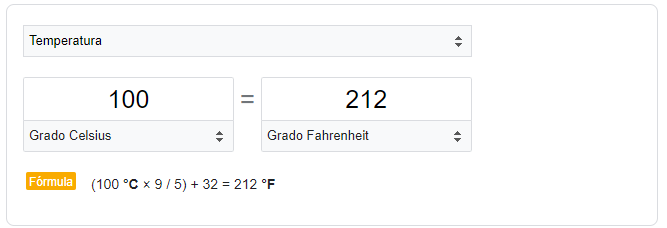
- En base a esto, podemos confirmar que nuestra red neurnal ha sido correctamente entrenada ya que nos devuelve un valor relativamente próximo al real.
